In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('CIA1_Dataset.csv')

data.head()

,income,loan_amount,credit_score,age,employment_years,approved
0,57450.71,206927.18,5.09,57,22,0
1,47926.04,187545.82,5.64,40,39,0
2,59715.33,293422.56,5.40,41,10,0
3,72845.45,220353.67,7.00,30,31,0
4,46487.70,227008.21,2.26,25,35,0


In [10]:
data.isna().sum()

income              0
loan_amount         0
credit_score        0
age                 0
employment_years    0
approved            0
dtype: int64

## Single Layer Perceptron to classify Loan Approvals

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data[['credit_score', 'age', 'employment_years']]
y = data['approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

perceptron = Perceptron(random_state=42, max_iter=1000)
perceptron.fit(X_train_scaled, y_train)

y_pred = perceptron.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9545

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       0.00      0.00      0.00         5

    accuracy                           0.95       110
   macro avg       0.48      0.50      0.49       110
weighted avg       0.91      0.95      0.93       110


Confusion Matrix:
[[105   0]
 [  5   0]]


/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

## Feed forward Neural Network with one hidden layer

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

keras_model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(3,)),  
    layers.Dense(1, activation='sigmoid') 
])

keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = keras_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_keras = (keras_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

accuracy_keras = accuracy_score(y_test, y_pred_keras)
print(f"Keras Neural Network Accuracy: {accuracy_keras:.4f}")
print("\nKeras Classification Report:")
print(classification_report(y_test, y_pred_keras))
print("\nKeras Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_keras))

Epoch 1/100


/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2017 - loss: 0.9839 - val_accuracy: 0.2273 - val_loss: 0.9182
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2358 - loss: 0.9418 - val_accuracy: 0.2386 - val_loss: 0.8819
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2614 - loss: 0.9037 - val_accuracy: 0.2955 - val_loss: 0.8475
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2869 - loss: 0.8677 - val_accuracy: 0.3750 - val_loss: 0.8148
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3097 - loss: 0.8332 - val_accuracy: 0.4091 - val_loss: 0.7851
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3494 - loss: 0.8023 - val_accuracy: 0.4545 - val_loss: 0.7565
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 0.7719 - val_accuracy: 0.5114 - val_loss: 0.7306
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 0.7449 - val_accuracy: 0.5795 - val_loss: 0.

/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/chloycosta/Documents/College_code/Sem_5/NNDL/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

Model Accuracy Comparison:
Perceptron Accuracy: 0.9545
Keras Neural Network Accuracy: 0.9545
Difference: 0.0000


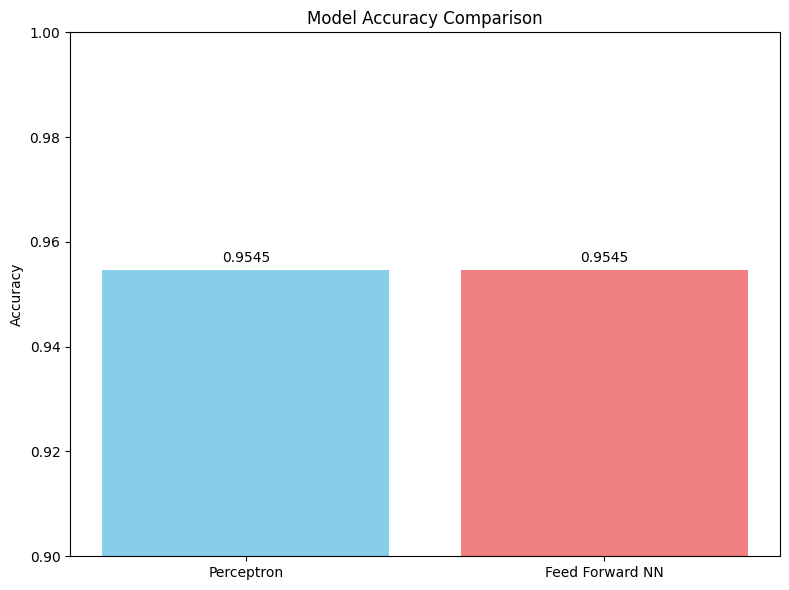

In [13]:
print("Model Accuracy Comparison:")
print(f"Perceptron Accuracy: {accuracy:.4f}")
print(f"Keras Neural Network Accuracy: {accuracy_keras:.4f}")
print(f"Difference: {abs(accuracy - accuracy_keras):.4f}")

models = ['Perceptron', 'Feed Forward NN']
accuracies = [accuracy, accuracy_keras]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

-  Both Perceptron and Single Hidden Layer peak at 95.45% accuracy
- This shows that both perform just as good 
- This likely is because there is no non-linearity in the data provided which eliminates the purpose of need for hidden layer 
- The data is linearly separable thus both models perform equally well 

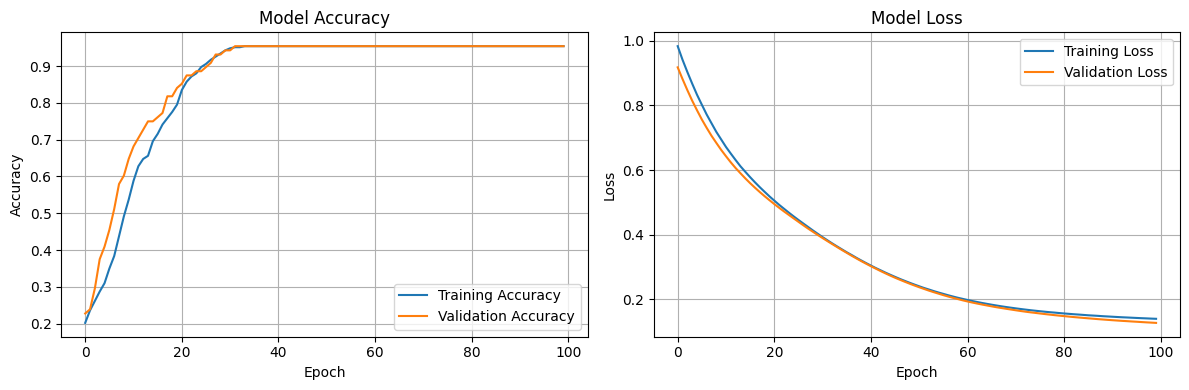

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- As we see this is the required curve that we see
- As the numbe of epochs increase model accuracy increased and loss function decreses meaning the difference between what we predicted and actual value is not that much it gets closer to actual value this shows our model to be getting better each epoch 
- We see after around 25 or so epoches the accuracy plateus 